In [1]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [2]:
dir="C:/Users/Expedition/Desktop/expedition2025_winter/"
ddir="C:/Users/Expedition/Desktop/expedition2024_summer/"

In [3]:
data = ert.load(dir + '26Mar/tl09_diag1_ws.tx0')
#data_topo = pd.read_csv(dir + '15Mar/k38_diag1_topo.txt', sep='\s+', header=None)


26/03/25 - 22:17:22 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
26/03/25 - 22:17:22 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
26/03/25 - 22:17:22 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
26/03/25 - 22:17:22 - pyGIMLi - INFO - No electrode positions found!
26/03/25 - 22:17:22 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 565


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x16afb422e90>)

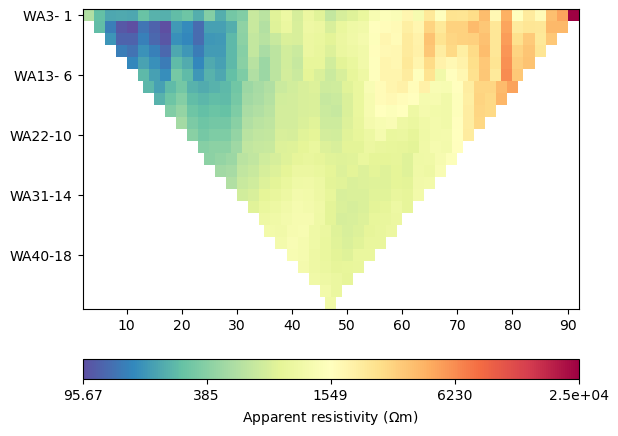

In [4]:
ert.showData(data)

In [5]:
data['err'] = data['err'] + 0.02

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x16afc714a10>)

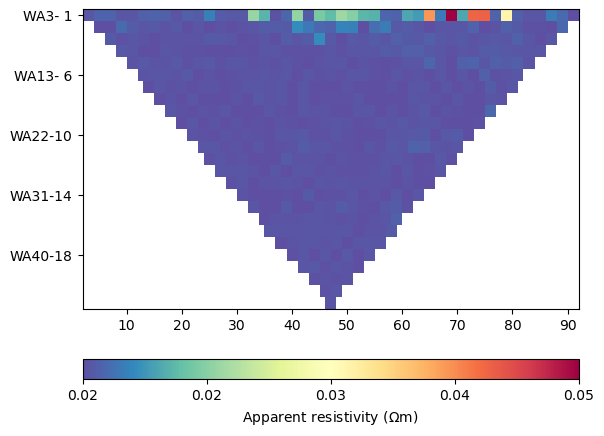

In [6]:
ert.showData(data,data['err'])

In [5]:
data.remove(data['rhoa']<=0.1)

In [7]:
data["k"] = ert.createGeometricFactors(data)

26/03/25 - 22:18:11 - pyGIMLi - INFO - Save RVector binary
26/03/25 - 22:18:11 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\5540751060307104124


In [14]:
data.markInvalid(data['err']>0.1)

26/03/25 - 22:21:00 - pyGIMLi - INFO - Found 2 regions.
26/03/25 - 22:21:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/03/25 - 22:21:00 - pyGIMLi - INFO - Found 2 regions.
26/03/25 - 22:21:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/03/25 - 22:21:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/03/25 - 22:21:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
26/03/25 - 22:21:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 15149 Cells: 29920 Boundaries: 22628
26/03/25 - 22:21:00 - pyGIMLi - INFO - Use median(data values)=897.206
26/03/25 - 22:21:00 - pyGIMLi - INFO - Created startmodel from forward operator:6466, min/max=897.206000/897.206000
26/03/25 - 22:21:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000016A8D466A70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 95.67/2.5e+04
min/max (error): 2%/4.63%
min/max (start model): 897/897
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1639.49
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  104.72 (dPhi = 93.36%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   16.92 (dPhi = 81.70%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    5.16 (dPhi = 59.81%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.31 (dPhi = 45.66%) lam: 10.0
------------------------------------------------

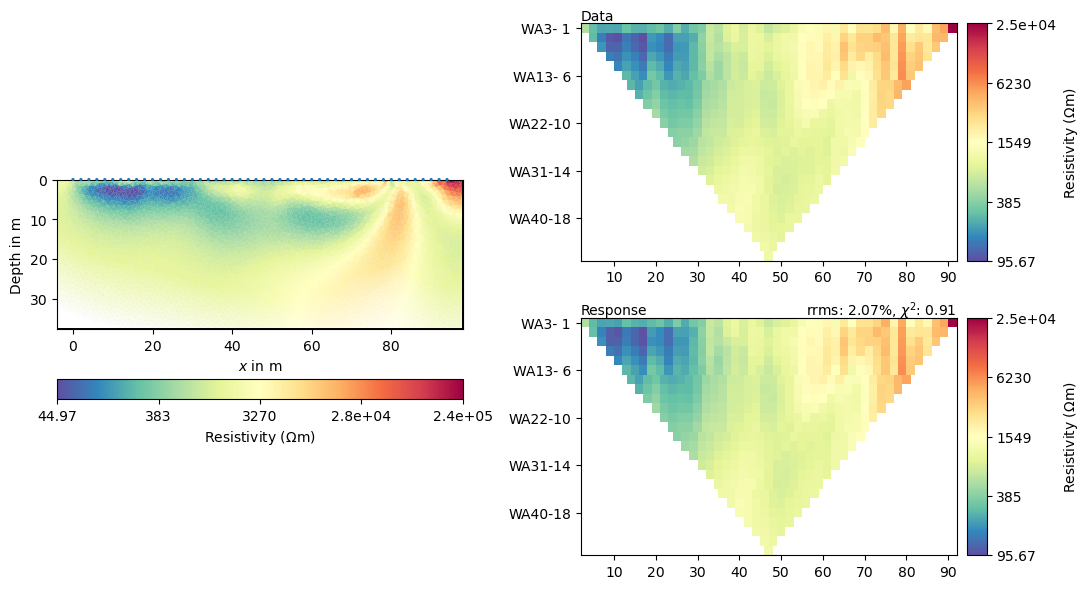

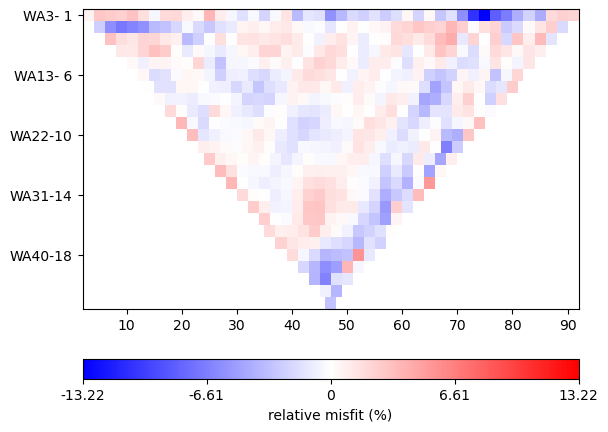

In [10]:
mgr = ert.ERTManager(data)
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, paraMaxCellSize=1)
mgr.showResultAndFit()
mgr.showMisfit()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x16b17ec5c10>)

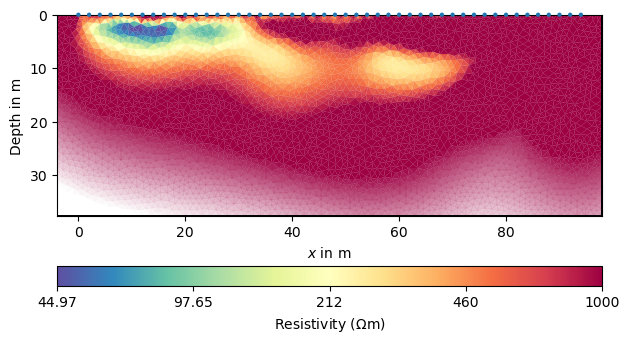

In [23]:
mgr.showResult(cMax=1000)

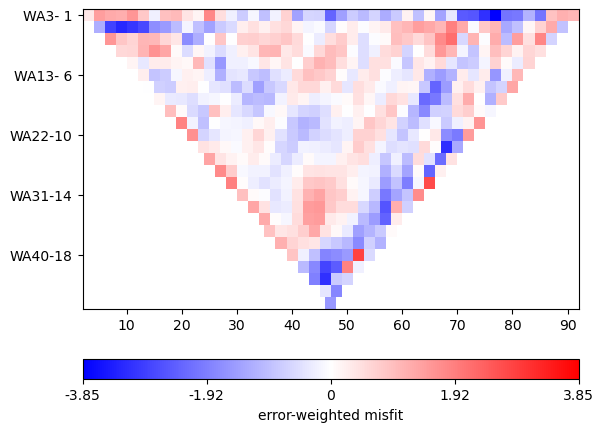

In [12]:
mgr.showMisfit(errorWeighted=True)

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1eaca175f90>)

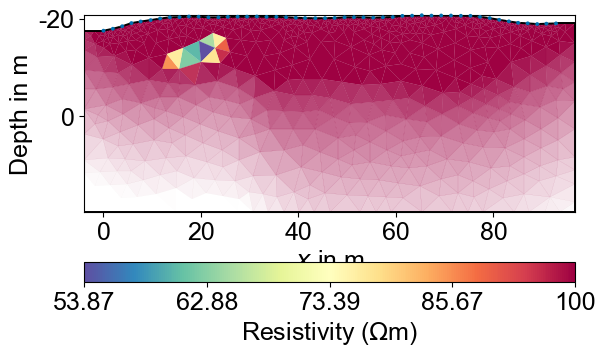

In [58]:
mgr.showResult(cMax=100)

15/03/25 - 02:44:27 - pyGIMLi - INFO - Saving inversion results to: C:/Users/Expedition/Desktop/expedition2025_winter/all_inversions/kamik_diag1_winter\ERTManager


Path C:/Users/Expedition/Desktop/expedition2025_winter/all_inversions/kamik_diag1_winter\ERTManager already exists. Skipping


('C:/Users/Expedition/Desktop/expedition2025_winter/all_inversions/kamik_diag1_winter\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

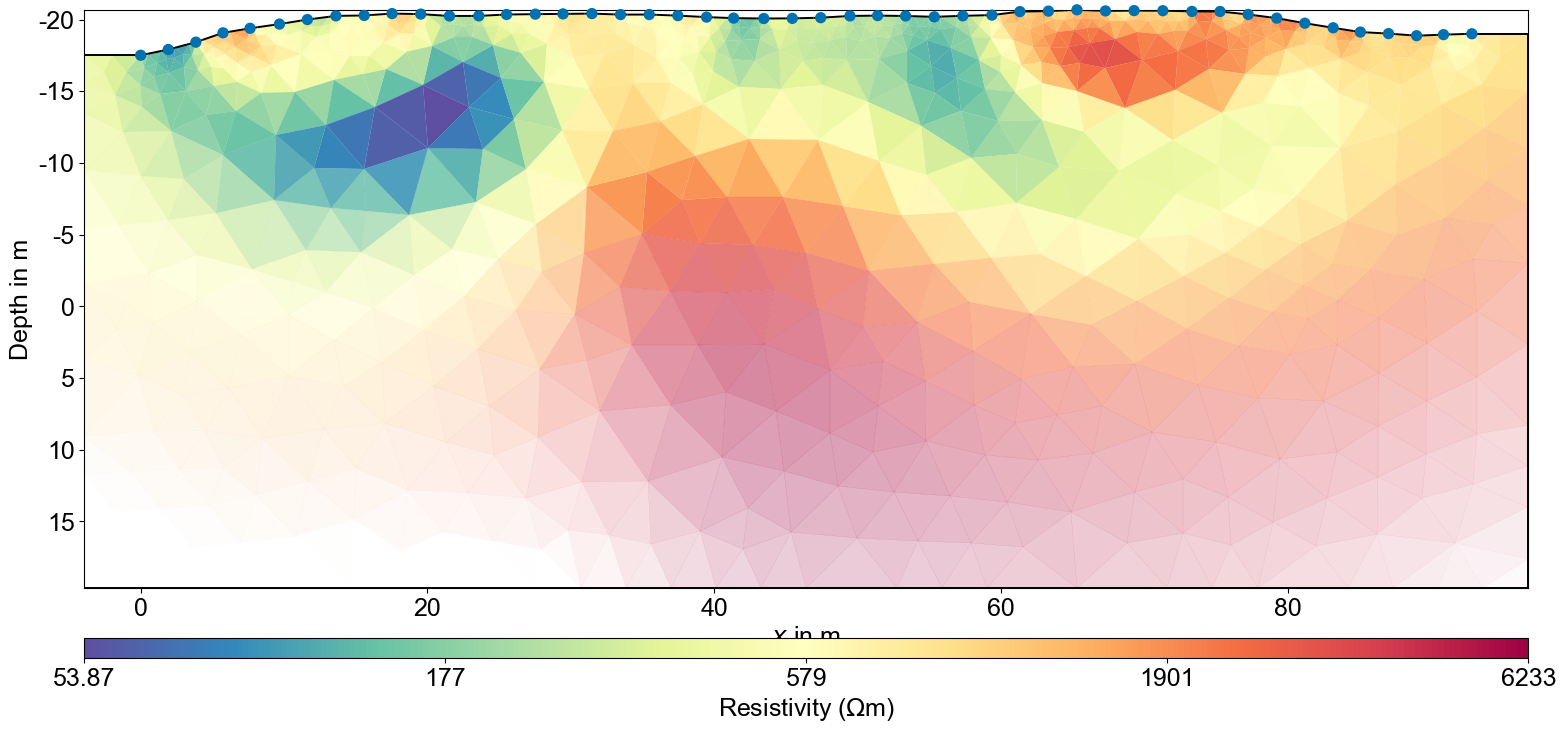

In [59]:
mgr.saveResult(dir+ 'all_inversions/kamik_diag1_winter')

In [60]:
mesh_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity-pd.bms')
res_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity.vector')
cov_kamik2024winter = pg.load(dir+'all_inversions/kamik_diag1_winter/ERTManager/resistivity-cov.vector')

mesh_kamik2024summer = pg.load(ddir+'all_inversions/kamik_diag1_summer/ERTManager/resistivity-pd.bms')
res_kamik2024summer = pg.load(ddir+'all_inversions/kamik_diag1_summer/ERTManager/resistivity.vector')
cov_kamik2024summer = pg.load(ddir+'all_inversions/kamik_diag1_summer/ERTManager/resistivity-cov.vector')

C:\Users\Expedition\AppData\Local\Temp\ipykernel_52648\2444055434.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
C:\Users\Expedition\AppData\Local\Temp\ipykernel_52648\2444055434.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


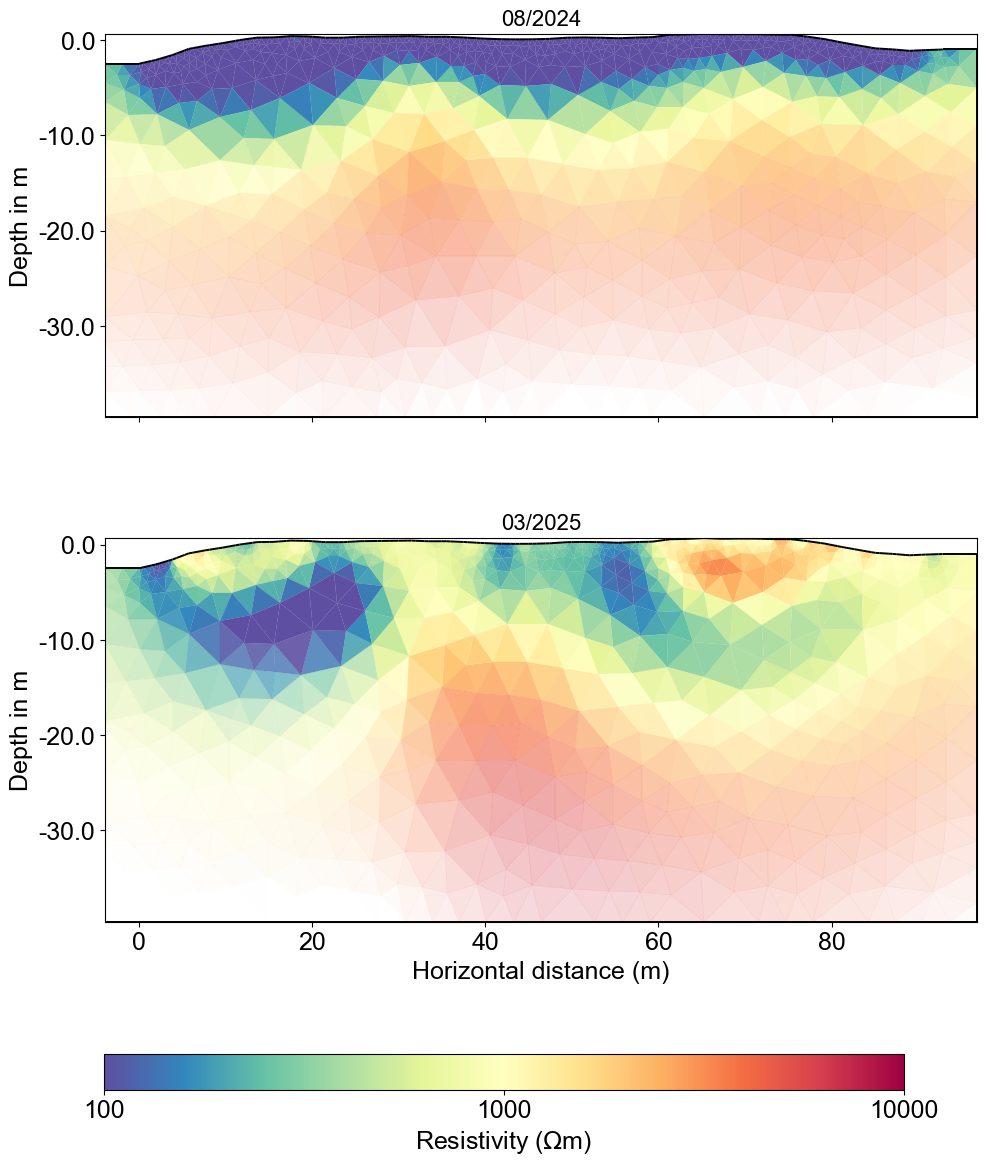

In [62]:
from matplotlib.ticker import LogLocator, LogFormatter

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.style.use('seaborn-v0_8-colorblind')
cMin=100
cMax=10000
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

pg.show(mesh_kamik2024summer, res_kamik2024summer, logScale=True, cMap= 'Spectral_r',ax=ax[0], cMin=cMin, cMax=cMax, colorBar=False, coverage=cov_kamik2024summer)
pg.show(mesh_kamik2024winter, res_kamik2024winter, logScale=True, cMap= 'Spectral_r',ax=ax[1], colorBar=False, cMin=cMin, cMax=cMax, coverage=cov_kamik2024winter, sharex=True)

#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, -0.01, 0.8, 0.03])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=cMin, cMax=cMax, logScale=True,cMap= 'Spectral_r')

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity ($\Omega$m)')

ax[0].set_title('08/2024', fontsize=16)
ax[1].set_title('03/2025', fontsize=16)


ax[0].set_aspect(1.1)
ax[1].set_aspect(1.1)


current_ticks = ax[0].get_yticks()
relative_ticks = current_ticks-20

ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax[0].set_xlabel("")
ax[1].set_xlabel("Horizontal distance (m)")

plt.show()

